In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <center>第二章：NumPy-快速处理数据</center>

NumPy提供了两种基本的对象:
+ ndarray: 它是存储**单—数掘类型**的多维数组
+ ufunc: 它是能够对数组进行处理的特殊函数。

In [2]:
import numpy as np
np.__version__

'1.21.2'

## ndarray
ndarray不仅高效地存储大量的数值元素，从而提高数组计算的运行速度，还能用它与各种扩展库进行数据交换。

### 创建ndarray对象

In [3]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [4]:
b = np.array([range(5), range(5,10)])
b

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

数组的形状可以通过其shape属性获得，它是一个描述数组各个轴的长度的元组

In [5]:
print(a.shape)
print(b.shape)

(5,)
(2, 5)


In [6]:
b.shape = 5,-1
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

注意reshape并不是对数组进行转置，而只是改变每个轴的大小, reshape其中一个值可以为-1，将自动计算此轴的长度，而且数组的内存地址不会改变

使用数组的reshape方法，可以创建指定形状的新数组，而原数组的形状保持不变

In [7]:
c = b.reshape(2, 5)
c
b

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

通过reshape得到的数组与原数组共享数椐存储空间，因此修改其中任意一个数组的元素都会同时修改另一个数组的内容

In [8]:
c[0,0] = 100
b[0,1] = 200
c
b

array([[100, 200,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

array([[100, 200],
       [  2,   3],
       [  4,   5],
       [  6,   7],
       [  8,   9]])

### 元素类型
数组的元素类型可以通过dtype属性获得

In [9]:
c.dtype

dtype('int32')

创建numpy数组时，可以通过dtype参数在创建数组时指定元素类型

In [10]:
c = np.array([1,2,3,4,5,6], dtype="int64")
c.dtype

dtype('int64')

可以通过下面命令查看有多少类型

In [11]:
set(np.sctypeDict.values())

{numpy.bool_,
 numpy.bytes_,
 numpy.clongdouble,
 numpy.complex128,
 numpy.complex64,
 numpy.datetime64,
 numpy.float16,
 numpy.float32,
 numpy.float64,
 numpy.int16,
 numpy.int32,
 numpy.int64,
 numpy.int8,
 numpy.intc,
 numpy.longdouble,
 numpy.object_,
 numpy.str_,
 numpy.timedelta64,
 numpy.uint16,
 numpy.uint32,
 numpy.uint64,
 numpy.uint8,
 numpy.uintc,
 numpy.void}

In [12]:
c = np.array([1,2,3], dtype=np.str_)
c
c.dtype

array(['1', '2', '3'], dtype='<U1')

dtype('<U1')

通过dtype属性获取到的类型和指定的类型看上去不太一样，其实要通过dtype的type属性获取指定的类型

In [13]:
c.dtype.type

numpy.str_

In [14]:
type(c)

numpy.ndarray

numpy的类型与 Python的类型对象不同的是，它的取值范围有限，因此会存在溢出的问题

In [15]:
a = np.int16(200)
a*a

D:\MyConfiguration\shucheng.wang\AppData\Local\Temp/ipykernel_1420/3539468671.py:2: RuntimeWarning: overflow encountered in short_scalars
  a*a


-25536

NumPy的数值对象的运算速度比Python的内置类型的运算速度慢很多

使用astype方法可以对数组的元素类型进行转换

In [16]:
a = c.astype(np.float64)
c
a

array(['1', '2', '3'], dtype='<U1')

array([1., 2., 3.])

### 自动生成数组
NumPy提供了很多专门用于创建数组的函数

arange类似于内置函数range

In [17]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

linspace通过指定起始值、终值和元素个数来创建等差数列的一维数组

In [18]:
np.linspace(0, 20, 6)

array([ 0.,  4.,  8., 12., 16., 20.])

可以通过endpoint参数指定是否包含终值

In [19]:
np.linspace(0, 20, 6, endpoint=False)

array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
       16.66666667])

logspace()和linspace()类似，不过它所创建的数组是等比数列

In [20]:
np.logspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

默认是基数是10，也就是0 到100的5个等比数列。可以通过base改变基数

In [21]:
np.logspace(0, 1, 12, base=2, endpoint=False)

array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863])

zeros、ones、empty可以创建指定形状和类型的数组

In [22]:
np.zeros((2,3), dtype=int)

array([[0, 0, 0],
       [0, 0, 0]])

In [23]:
np.ones(4, dtype=np.float32)

array([1., 1., 1., 1.], dtype=float32)

In [24]:
np.empty((2,2))

array([[2.12199579e-314, 9.62370625e+242],
       [6.10665138e-321, 3.79442416e-321]])

empty只分配数组所使用的内存，不对数组元素进行初始化操作，因此它的运行速度是最快的。而zeros将数组元素初始化为0, ones将数组元素初始化为1。

full()将数组元素初始化为指定的值

In [25]:
np.full((2,2), np.pi)

array([[3.14159265, 3.14159265],
       [3.14159265, 3.14159265]])

此外，zeros_like()、ones_like()、empty_like()、full_like()等函数创建与其他数组的形状和类型相同的数组。

In [26]:
np.zeros_like(a)

array([0., 0., 0.])

In [27]:
np.zeros(a.shape, a.dtype)

array([0., 0., 0.])

frombuffer()、fromstring()、fromfile()等函数可以从字节序列或文件创建数组。但这几个函数不常用

In [28]:
np.fromstring("abcdefgh", dtype=np.int8)

D:\MyConfiguration\shucheng.wang\AppData\Local\Temp/ipykernel_1420/2305350795.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring("abcdefgh", dtype=np.int8)


array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8)

In [29]:
np.fromstring("abcdefgh", dtype=np.int16)

D:\MyConfiguration\shucheng.wang\AppData\Local\Temp/ipykernel_1420/4284025837.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring("abcdefgh", dtype=np.int16)


array([25185, 25699, 26213, 26727], dtype=int16)

Python的字符串实际上是一个字节序列，每个字符占一个字节。因此如果从字符串创建一个8位的整数数组，所得到的数组正好就是字符串中每个字符的ASCII编码。所以fromstring只能转成有限的类型数据。

fromfunction()通过此函数创建数组

In [30]:
def func(i):
    return i % 4
np.fromfunction(func, (10,))

array([0., 1., 2., 3., 0., 1., 2., 3., 0., 1.])

fromfunction()的第一个参数是计算每个数组元素的函数，第二个参数指定数组的形状。实际上是根据数组下标使用函数生成数组

In [31]:
def func2(i, j):
    return (i + 1) * (j + 1) 
np.fromfunction(func2, (3,3))

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

### 存取元素

####  切片存取

In [32]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
a[5]
a[3:-1]
a[::-1]

5

array([3, 4, 5, 6, 7, 8])

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

和list的切片用法一样

In [34]:
a[1:3]=100,200
a

array([  0, 100, 200,   3,   4,   5,   6,   7,   8,   9])

和列表不同的是，通过切片获取的新的数组是原始数组的一个视阁。它与原始数组共享同 一块数椐存储空间

In [35]:
b = a[5:]
b[2] = b[2]*100
b
a

array([  5,   6, 700,   8,   9])

array([  0, 100, 200,   3,   4,   5,   6, 700,   8,   9])

除了使用切片存取元素之外，NumPy还提供了整数列表、整数数组和布尔数组等几种高级下标存取方法。

####  整数列表存取

当使用整数列表对数组元素进行存取时，将使用列表中的每个元素作为下标。使用列表作为下标得到的数组不和原始数组共享数据

In [36]:
a = np.arange(10)
b = a[[3,2,-1,8]]
a
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([3, 2, 9, 8])

In [37]:
b[1]=20
a
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 3, 20,  9,  8])

In [38]:
a[[3,2,-1,8]] = 30, 20, -10, 80
a

array([  0,   1,  20,  30,   4,   5,   6,   7,  80, -10])

####  numpy整数数组存取

当使用numpy整数数组作为数组下标时，将得到一个形状和下标数组相同的新数组，新数组的每个元素都是用下标数组中对应位置的值作为下标从原数组获得的值。

In [39]:
b = a[np.array([3,2,-1,8])]
b

array([ 30,  20, -10,  80])

numpy整数数组下标也可以是多维数组

In [40]:
a[np.array([[3,2,-1,8],[-1,-2,-3,-4],[-2,-3,-4,-5]])]

array([[ 30,  20, -10,  80],
       [-10,  80,   7,   6],
       [ 80,   7,   6,   5]])

In [41]:
a[np.array([1,2,8])] = 10,20,80
a

array([  0,  10,  20,  30,   4,   5,   6,   7,  80, -10])

#### 布尔数组存取
布尔数组存取元素时 获得的是与布尔数组中True对应的值

In [43]:
a = np.arange(5)
a[np.array([True,False,False,True,False])]

array([0, 3])

使用布尔数组作为下标获得的数组也不和原始数组共享数据内存

In [44]:
a[np.array([False,True,False,True,False])]=10,30
a

array([ 0, 10,  2, 30,  4])

当使用的是布尔列表，也是按照布尔数组的方式存取。

In [46]:
a[[True,False,False,True,False]]

array([ 0, 30])

### 多维数组
多维数组本质上和一维数组一样，每个轴都是一维数组。因为多维数组有多个轴，所以它的下标需要用多个值来表示。

In [47]:
a = np.array(range(36)).reshape(6,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

#### 切片存取
和一维数组相同，每一个轴都可以使用切片
<img src="img/2-1.png">

切片得到的结果与原数组共享内存空间

In [48]:
b = a[1, 3:5]
b[0] = -b[0]
a[1, 3:5]

array([-9, 10])

In [49]:
a[4:, 3:5] = [[100, 200], [300, 400]]
a

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7,   8,  -9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23],
       [ 24,  25,  26, 100, 200,  29],
       [ 30,  31,  32, 300, 400,  35]])

#### 切片
Python中使用slice()创建切片对象

In [50]:
idx = slice(None, None, 2), slice(1, 2, None)
a[idx]

array([[ 1],
       [13],
       [25]])

numpy中使用s_对象创建切片对象

In [51]:
idx = np.s_[::2, 1::]
idx

(slice(None, None, 2), slice(1, None, None))

In [52]:
a[idx]

array([[  1,   2,   3,   4,   5],
       [ 13,  14,  15,  16,  17],
       [ 25,  26, 100, 200,  29]])

#### 其他方式存取
和一维数组相同，多维数组也可以使用整数列表、整数数组和布尔数组存取元素，而且所获得的数椐是原始数据的副本，因此修改结果数组不会改变原始数组。

In [54]:
a[(0,1,2,3),(1,2,3,4)]

array([ 1,  8, 15, 22])

从两个序列的对应位置取出两个整数组成下标, 于是得到的结果是：a[0,1]、a[1,2]、a[2,3]、a[3,4]。

In [55]:
a[3:, [0,2,5]]

array([[18, 20, 23],
       [24, 26, 29],
       [30, 32, 35]])

In [56]:
mask = np.array([1,0,1,0,0,1])
a[mask, 1]

array([7, 1, 7, 1, 1, 7])

In [57]:
mask1 = mask.astype(bool)
a[mask1, 1]

array([ 1, 13, 31])

In [59]:
a[[1,2]]
a[[1,2],:]

array([[ 6,  7,  8, -9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

array([[ 6,  7,  8, -9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

当下标的长度小于数组的维数时，剩余的各轴所对应的下标是“:”

In [61]:
x = np.array([[0,1],[2,3]])
y = np.array([[-1,-2],[-3,-4]])
a[x,y]
np.array([[a[0,-1],a[1,-2]], [a[2,-3],a[3,-4]]])

array([[ 5, 10],
       [15, 20]])

array([[ 5, 10],
       [15, 20]])

当所有轴都用形状相同的整数数组作为下标时，得到的数组和下标数组的形状相同。

In [62]:
a[x]
np.array([[a[0,:],a[1,:]], [a[2,:],a[3,:]]])

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8, -9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]])

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8, -9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]])

### 结构数组
这个不用了解，只要熟悉后面的pandas，比这个结构数组方便多了

### 内存结构
下面让我们看看数组对象是如何在内存中存储的
<img src="img/2-2.png">

数据存储区域保存着数组中所有元素的二进制数据，dtype对象则知道如何将元素的二进制数据转换为可用的值。数组的维数和形状等信息都保存在ndarray数组对象的数据结构中。

数组对象使用strides属性保存每个轴上相邻两个元素的地址差，即当某个轴的下标增加1时，数据存储区中的指针所増加的字节数。

In [65]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32)
b = a[::2, ::2]
a
b

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)

array([[0., 2.],
       [6., 8.]], dtype=float32)

In [66]:
a.strides
b.strides

(12, 4)

(24, 8)

由于数组b和数组a共享数据存储区，而数组b中的第0轴和第1轴都是从a中隔一个元素取一个，因此数组b的strides变成了(24,8),正好都是数组a的两倍

元素在数据存储区中的排列格式有两种：C语言格式和Fortran语言格式。在C语言中，多维数组的第0轴是最上位的，即第0轴的下标增加1时，元素的地址增加的字节数最多，而Fortran语言格式则相反。  
在NumPy中默认以C语言格式存储数据，如果希望改为Fortran格式，只需要在创建数组时，设置order参数为F:

In [69]:
c = np.array([[0,1,2], [3,4,5], [6,7,8]], dtype=np.float32, order="F")
c.strides

(4, 12)

了解了数组的内存结构，就可以解释使用下标取得数据时的复制和引用问题。
+ 当使用切片时，所取得的数据在数据存储区域中是等间隔分布。只需要修改数据结构中的dim count、dimensions、strides等属性以及指向数据存储区域的指针,就可以获得数据。
+ 当使用整数序列、整数数组和布尔数组时，不能保证所取得的数椐在数据存储区域中是等间隔的，因此无法和原始数组共享数裾，只能对数据进行复制。

数组的flags属性描述了数据存储区域的一些属性

In [70]:
c.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

+ C_CONTIGUOUS：数据存储区域是否是C语言格式的连续区域
+ F_CONTIGUOUS：数据存储区域适否是Fortran语言格式的连续区域
+ OWNDATA： 数组是否拥有此数据存储区域，当一个数组是其他数组的视图时，该值为False。

In [71]:
c.T.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [72]:
c[::2, ::2].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

## ufunc 函数
这是一种能对数组的每个元素进行运算的函数

In [3]:
a = np.linspace(0, 2*np.pi, 10)
b = np.sin(a)
b

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

np.sin()是一个ufunc函数，因此在其内部对数组x的每个元素进行循环计算，它的速度要比math.sin()快多了，因为NumPy内置的许多ufunc函数都是用C语言实现的。但是就单独计算某个数字而言，math.sin的速度很快。

In [4]:
import math

In [6]:
x = math.sin(0.5)
y = np.sin(0.5)
print(x, type(x))
print(y, type(y))

0.479425538604203 <class 'float'>
0.479425538604203 <class 'numpy.float64'>


np.sin()的返回值类型和math.sin()的不同，将其转换为Python的标准类型还需要花费额外的时间。为了解决这个问题，数组提供了item()方法。

In [7]:
type(b[1])
type(b.item(1))

numpy.float64

float

### 四则运算

add()返回一个数组，它的每个元素都是两个参数数组的对应元素之和。

In [10]:
a = np.arange(0, 4)
b = np.arange(1,5)
a
b
np.add(a, b)

array([0, 1, 2, 3])

array([1, 2, 3, 4])

array([1, 3, 5, 7])

大部分ufunc函数都可以指定out参数，指定输入的数组。

In [11]:
a
np.add(a, b, out=a)
a

array([0, 1, 2, 3])

array([1, 3, 5, 7])

array([1, 3, 5, 7])

NumPy为数组定义了各种数学运算操作符：
<img src="img/2-3.png">

数组对象支持操作符，极大地简化了算式的编写，不过要注意如果算式很复杂，并且要运算的数组很大，将会因为产生大量的中间结果而降低程序的运算速度。  
假设对a、b、c 三个数组采用算式x=a\*b+c加以计算，那么它相当于
```
t = a*b
x = t+c
del t
```
需要产生一个临时数组t来保存乘法的运算结果。应改成：
```
x = a*b
x += c
```

### 比较运算和布尔运算
使用==、>等比较运算符对两个数组进行比较，将返回一个布尔数组，它的每个元素值都是两个数组对应元素的比较结果。

In [13]:
np.array([1, 2, 3]) < np.array([3, 2, 1])

array([ True, False, False])

每个比较运算符也与一个ufunc函数对应:
<img src="img/2-4.png">

由于Python中的布尔运算使用and、or和not等关键字，它们无法被重载，因此数组的布尔运算只能通过相应的ufunc函数进行:
+ np.logical_and : 与运算
+ np.logical_or :  或运算
+ np.logical_not : 非运算
+ np.logical_xor : 异或运算

In [15]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
a>=b
np.logical_or(a>b, a==b)

array([False,  True,  True])

array([False,  True,  True])

注意数组不能使用and，or 和 not等关键字，否则会报错

In [16]:
a>b and a==b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

错误信息告诉我们可以使用数组的any()或all()方法:
+ any: 只要数组中有一个元素值为True,就为True
+ all: 只有数组中全部元素值为True,就为True

In [17]:
np.any(a==b)

True

以 bitwise_开头的函数是位运算函数，包括 bitwise_and、bitwise_not、bitwise_or 和 bitwise_xor等。也可以使用&、〜、丨和^等操作符进行计算。

In [18]:
(a == b) | (a > b)

array([False,  True,  True])

In [19]:
~np.arange(5)

array([-1, -2, -3, -4, -5], dtype=int32)

### 自定义ufunc函数
可以用frompyfunc()将计算单个元素的函数转换成ufunc函数，可以用一个分段函数描述三角波:
<img src="img/2-5.png">

In [20]:
def triangle_wave(x, c, c0, he):
    x = x - int(x) #三角波的周期为1，因此只取x坐标的小数部分进行计算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * he
    else: r = (c-x) / (c-c0) * he
    return r

In [17]:
import matplotlib.pyplot as plt

首先使用列表表达式：

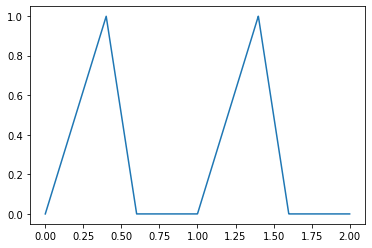

In [22]:
%matplotlib inline
x = np.linspace(0,2,2000)
y = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])
plt.plot(x, y)
plt.show()

通过frompyfunc()可以将计算单个值的函数转换为能对数组的每个元素进行计算的ufunc函数, frompyfunc()接受三个参数：
+ 函数
+ 该函数入参个数
+ 该函数返回值的个数

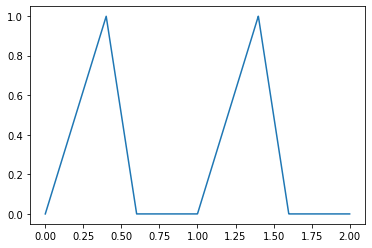

In [23]:
func = np.frompyfunc(triangle_wave, 4, 1)
y2 = func(x, 0.6, 0.4, 1.0)
plt.plot(x, y2)
plt.show()

但是返回的数组的元素类型是object

In [24]:
y2.dtype

dtype('O')

使用vectorize()也可以实现和frompyfunc()类似的功能，但它可以通过otypes参数指定返回的数组的元素类型。

In [27]:
ufunc2 = np.vectorize(triangle_wave, otypes= [np.float64])
y3 = ufunc2(x, 0.6, 0.4, 1.0)
np.all(y==y3)

True

### 广播
当使用ufunc函数对两个数组进行计算时,ufunc函数会对这两个数组的对应元素进行计算, 因此它要求这两个数组的形状相同。如果形状不同，会进行如下广播处理：
+ 让所有输入数姐都向其中维数最多的数组看齐，shape属性中不足的部分都通过在前面加 1补齐。
+ 输出数组的shape属性是输入数组的shape属性的各个轴上的最大值
+ 如果输入数组的某个轴的长度为1 或 与输出数组的对应轴的长度相同，这个数组能够用来计算，否则出错。
+ 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值。

In [28]:
a = np.array([1,2,3])
b = np.array([[10],[20],[30]])
a, a.shape
b, b.shape

(array([1, 2, 3]), (3,))

(array([[10],
        [20],
        [30]]),
 (3, 1))

In [29]:
a+b

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

根据规则1：a的shape变成（1，3）  
根据规则2：输出数组的shape是（3，3）  
根据规则3：可以计算  
根据规则4：a的第0轴为1，计算输出结果的第0轴时，总是使用\[1,2,3\]。同理计算第1轴时，b总是使用\[10,20,30\]

可以使用np.broadcast_arrays()查看广播之后参与运算的数组：

In [34]:
a0,b0 = np.broadcast_arrays(a, b)
a0
b0

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

### ufunc的方法
ufunc函数对象本身还有一些方法函数，这些方法只对两个输入，一个输出的ufunc函数有效

reduce()方法和Python的reduce（）函数类似，它沿着axis参数指定的轴对数组进行操作：

In [31]:
np.add.reduce([1,2,3])
np.subtract.reduce([[14,5,6],[1,2,3]], axis=1)

6

array([ 3, -4])

accumulate()方法和reduce()类似，只是它返回的数组和输入数组的形状相同，保存所有的中间计算结果:

In [32]:
np.add.accumulate([1,2,3])
np.subtract.accumulate([[14,5,6],[1,2,3]], axis=1)

array([1, 3, 6], dtype=int32)

array([[14,  9,  3],
       [ 1, -1, -4]], dtype=int32)

### 多维数组的下标
多维数组的下标功能十分强大，同时也更加复杂

In [35]:
a = np.arange(2*3*4).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

多维数组的下标应该是一个长度和数组的维数相同的元组。如栗下标元组的长度比数组的维数大，就会出错；如果小，就会在下标元组的后面补“：”

In [37]:
a[([0],[1])]

array([[4, 5, 6, 7]])

In [38]:
a[([0],[1],[2,3])]

array([6, 7])

In [39]:
a[0, 1, 2:4]

array([6, 7])

In [40]:
a[np.array([[0],[1]])]

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]],


       [[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]])

### 整数数组作为下标
整数数组作为下标必须满足广播条件

In [44]:
i0 = np.array([[1, 0, 1], [0, 1, 0]])
i1 = np.array([[[0]], [[1]]])
i2 = np.array([[[2, 3, 2]]]) 
b = a[i0, i1, i2]
b

array([[[14,  3, 14],
        [ 2, 15,  2]],

       [[18,  7, 18],
        [ 6, 19,  6]]])

可能一下子看不出下标是怎么取值的，使用广播看一下：

In [46]:
ind0,ind1, ind2 = np.broadcast_arrays(i0, i1, i2)
ind0
ind1
ind2

array([[[1, 0, 1],
        [0, 1, 0]],

       [[1, 0, 1],
        [0, 1, 0]]])

array([[[0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1]]])

array([[[2, 3, 2],
        [2, 3, 2]],

       [[2, 3, 2],
        [2, 3, 2]]])

In [47]:
i, j, k = 0, 1, 2
b[i,j,k], a[ind0[i,j,k],ind1[i,j,k], ind2[i,j,k]]

(2, 2)

当存在切片下标时，情况就变得更加复杂了。可以细分为两种情况：
+ 下标元组中的整数数组之间没有切片
+ 下标元组中的整数数组之间存在切片

In [57]:
c = a[1:,i0,i1]
c

array([[[[16, 12, 16],
         [12, 16, 12]],

        [[17, 13, 17],
         [13, 17, 13]]]])

In [58]:
c.shape

(1, 2, 2, 3)

i0和i1广播之后的shape是（2，2，3）。c的shape就是（切片长度, 2，2，3）

In [53]:
c = a[i0,1:3,i2]
c

array([[[[18, 22],
         [ 7, 11],
         [18, 22]],

        [[ 6, 10],
         [19, 23],
         [ 6, 10]]]])

In [54]:
c.shape

(1, 2, 3, 2)

i0和i2广播之后的shape是（1，2，3）, c的shape就是（1，2，3，切片长度）

## 庞大的函数库
NumPy还提供了大量对数组进行处理的函数。充分利用这些函数，能够简化程序的逻辑，提高运算速度。

### 随机函数
numpy.random模块中提供了大量的随机数相关的函数，用于生成随机数组。

#### rand
rand()产生0到1之间的随机浮点数，它的所有参数用于指定所产生的数组的形状。

In [61]:
np.random.rand(2,3)

array([[0.42808239, 0.86756475, 0.8961507 ],
       [0.61058667, 0.18584667, 0.60081484]])

In [62]:
np.set_printoptions(precision=2) #为了节街篇幅，只显示小数点后两位数字

#### randn
randn()产生标准正态分布的随机数组

In [63]:
np.random.randn(2,3)

array([[ 0.8 ,  1.3 ,  0.11],
       [-0.69,  1.98, -0.63]])

#### randint
randint()产生指定范围的随机整数数组，包括起始值，但是不包括终值, 它的第三个参数用于指定数组的形状

In [64]:
np.random.randint(0, 10, (2,2))

array([[3, 4],
       [0, 5]])

#### normal
正态分布，前两个参数分别为期望值和标准差

In [65]:
np.random.normal(0, 10, (2,2))

array([[  2.42,  -1.3 ],
       [ 22.47, -16.52]])

#### uniform
均匀分布，前两个参数分别为区间的起始值和终值。

In [66]:
np.random.uniform(0, 10, (2,2))

array([[6.02, 7.72],
       [5.  , 0.46]])

#### poisson
泊松分布，第一个参数指定泊松系数。由于泊松分布是一个离散分布，因此它输出的数组是一个整数数组。

In [67]:
np.random.poisson(2.0, (4, 3))

array([[2, 5, 0],
       [2, 2, 3],
       [0, 2, 3],
       [1, 0, 7]])

#### permutation
用于产生一个乱序数组，当参数为整数n时，它返回\[0，n)这n个整数的随机排列；当参数为一个序列时，它返回一个随机排列之后的序列。

In [68]:
np.random.permutation(5)
np.random.permutation([1,2,3,4])

array([4, 2, 3, 1, 0])

array([2, 3, 4, 1])

#### shuffle
permutation()返回一个新数组，而shuffle()则直接将参数数组的顺序打乱

In [69]:
a = np.array([1, 10, 20, 30, 40])
np.random.shuffle(a)
a

array([20, 40,  1, 30, 10])

#### choice
指定的样本中随机进行抽取：
+ size参数用于指定输出数组的形状
+ replace参数为True时，进行可重复抽取，而为False吋进行不重复抽取，默认值为True。
+ p参数指定每个元素对应的抽取概率，如果不指定，所有的元素被抽取到的概率相同。

In [71]:
a = np.arange(10, dtype=float)
np.random.choice(a, size=(4,3))
np.random.choice(a, size=(3,3), replace=False)
np.random.choice(a, size=(4,3), p=a/np.sum(a))

array([[6., 8., 7.],
       [1., 3., 4.],
       [1., 5., 6.],
       [9., 7., 3.]])

array([[8., 5., 0.],
       [1., 6., 4.],
       [9., 7., 3.]])

array([[8., 4., 2.],
       [8., 9., 5.],
       [7., 2., 9.],
       [9., 7., 7.]])

为了保证每次运行时能重现相同的随机数，可以通过seed()函数指定随机数的种子

In [72]:
np.random.seed(11)
np.random.rand(2,3)
np.random.seed(21)
np.random.rand(2,3)

array([[0.18, 0.02, 0.46],
       [0.72, 0.42, 0.49]])

array([[0.05, 0.29, 0.72],
       [0.02, 0.21, 0.05]])

In [73]:
np.random.seed(11)
np.random.rand(2,3)
np.random.seed(21)
np.random.rand(2,3)

array([[0.18, 0.02, 0.46],
       [0.72, 0.42, 0.49]])

array([[0.05, 0.29, 0.72],
       [0.02, 0.21, 0.05]])

### 求和、平均值、方差
<img src="img/2-6.png">

In [74]:
np.random.seed(42)
a = np.random.randint(0, 10,size=(4,5))
a

array([[6, 3, 7, 4, 6],
       [9, 2, 6, 7, 4],
       [3, 7, 7, 2, 5],
       [4, 1, 7, 5, 1]])

In [75]:
a.sum()

96

In [76]:
a.sum(axis=1)
a.sum(axis=0)

array([26, 28, 24, 18])

array([22, 13, 27, 18, 16])

希望能够保持原数组的维数，这时可以设置keepdims参数为True

In [77]:
a.sum(axis=0, keepdims=True)

array([[22, 13, 27, 18, 16]])

能够和原始数组进行广播运算

mean()求数组的平均值，它的参数与sum()相同。和sum()不同的是：对于整数数组它使用双精度浮点数进行计算，而对于其他类型的数组，则使用和数组元素类型相同的类型进行计算

average()也可以对数组进行平均计算。它没有out和dtype参数，但有一个指定每个元素权值的weights参数，可以用于计算加权平均数。

In [78]:
score = np.array([80,90,83])
nums = np.array([12,20,8])
np.average(score, weights=nums)

85.6

std()和var()分别计算数组的标准差和方差，有axis、out、dtype以及keepdims等参数。

In [6]:
a = np.random.normal(0, 3, (300,50))
a.var(axis=1, ddof=0).mean()
a.var(axis=1, ddof=1).mean()

8.773755064297342

8.952811290099328

当ddof参数为0时，计算偏样本方差；当ddof为1时，计算无偏样本方差。默认为0。  
可以看到无偏样本方差的期望值接近于总体方差,而偏样本方差小一些。

偏样本方差是正态分布随机变量的最大似然估计。首先了解一下什么是正态分布最大似然估计。正态分布的概率密度函数公式如下：
  
$$f(x | \mu,\sigma^2)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

所谓最大似然佔计，就是找到一组参数($\mu$, $\sigma$)使得样本的乘积最大：
$$f(x_1)f(x_2)\cdots f(x_n)$$

使用程序来验证：

In [7]:
def normal_pdf(mean, var, x):
    '''计算正态分布的概率密度的函数'''
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(x - mean) ** 2 / (2 * var))

# 生成正态分布的样本
a = np.random.normal(0, 2, size=10)
a

array([-2.05412137, -0.18622036,  0.96010031,  1.06942424, -0.07583805,
       -0.84778237, -1.71137085, -1.64076178, -1.31798904,  3.18818489])

In [9]:
# 计算样本的均值和方差
mean, var = a.mean(), a.var()
mean, var

(-0.2616374387843031, 2.38820056625021)

这个就是最大似然估计的参数

In [13]:
# 生成一系列的方差参数
var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)
p = normal_pdf(mean, var_range[:, None], a)
p = np.product(p, axis=1)

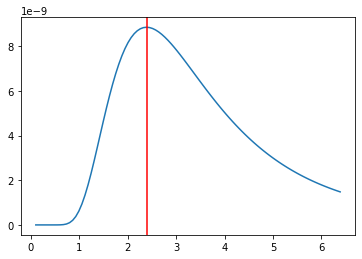

In [15]:
%matplotlib inline
plt.plot(var_range, p) 
plt.axvline(var, 0, 1, c="r")
plt.show()

可以看到偏样本方差位于似然估计曲线的最大值处

### 大小与排序
<img src="img/2-7.png">

#### 一个数组中最大值与最小值

In [17]:
a = np.random.randint(0, 100, (3,4))
a

array([[26, 69, 92, 86],
       [ 1,  8, 51, 62],
       [93, 95,  8,  3]])

In [19]:
a.max()        # 全部的最大值
a.max(axis=0)  # 第0轴上的最大值
a.max(axis=1)  # 第1轴上的最大值

95

array([93, 95, 92, 86])

array([92, 62, 95])

min的用法和max一样，都有axis、out、keepdims参数。

同样地，可以使用argmax(),argmin()获取最值的下标

In [21]:
a.argmin()        # 把数组平坦化之后的最小值下标，有多个最值时得到第一个最值的下标
a.argmin(axis=0)  # 第0轴上的最小值
a.argmin(axis=1)  # 第1轴上的最小值

4

array([1, 1, 2, 2], dtype=int64)

array([0, 0, 3], dtype=int64)

可以使用unravel_index()将一维数组的下标转换为多维数组的下标：

In [22]:
np.unravel_index(a.argmin(), a.shape)

(1, 0)

#### 两个数组比较

In [23]:
b = np.random.randint(0, 100, (3,4))
b

array([[89, 17, 94, 39],
       [74, 42, 96, 39],
       [92, 49, 94, 57]])

maximum()和minimum()用于比较两个数组相应元素的大小。

In [24]:
np.maximum(a, b)

array([[89, 69, 94, 86],
       [74, 42, 96, 62],
       [93, 95, 94, 57]])

In [28]:
x = np.array([1, 3, 5, 7])
y = np.array([2, 4, 6])
np.maximum(x[:, None], y[None, :])

array([[2, 4, 6],
       [3, 4, 6],
       [5, 5, 6],
       [7, 7, 7]])

比较两个数组对应下标的元素，返回数组的形状为两参数数组广播之后的形状。

#### 计算最大值最小值的差

In [30]:
a.ptp()
a.ptp(axis=0)
a.ptp(axis=1)

94

array([92, 87, 84, 83])

array([66, 61, 92])

#### 排序

In [32]:
a.sort()
a

array([[26, 69, 86, 92],
       [ 1,  8, 51, 62],
       [ 3,  8, 93, 95]])

直接使用数组的sort()方法会改变原数组。而使用np.sort()不会改变原数组，而是生成一个新数组：

In [33]:
np.sort(b)
b

array([[17, 39, 89, 94],
       [39, 42, 74, 96],
       [49, 57, 92, 94]])

array([[89, 17, 94, 39],
       [74, 42, 96, 39],
       [92, 49, 94, 57]])

In [35]:
np.sort(b, axis=0)
np.sort(b, axis=1)
np.sort(b, axis=None)

array([[74, 17, 94, 39],
       [89, 42, 94, 39],
       [92, 49, 96, 57]])

array([[17, 39, 89, 94],
       [39, 42, 74, 96],
       [49, 57, 92, 94]])

array([17, 39, 39, 42, 49, 57, 74, 89, 92, 94, 94, 96])

axis默认值为-1，当为None时，即平坦化后排序

argsort()返回数组的排序下标， 而且不会改变原数组：

In [39]:
a.argsort()
a.argsort(axis=0)

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]], dtype=int64)

array([[1, 1, 1, 1],
       [2, 2, 0, 0],
       [0, 0, 2, 2]], dtype=int64)

可以使用广播的方法，从排序下标中获取排序后的数组：

In [41]:
idx1, idx2 = np.ogrid[:b.shape[0], :b.shape[1]]
idx1, idx2

(array([[0],
        [1],
        [2]]),
 array([[0, 1, 2, 3]]))

In [42]:
b[idx1, b.argsort()]

array([[17, 39, 89, 94],
       [39, 42, 74, 96],
       [49, 57, 92, 94]])

In [43]:
b[b.argsort(axis=0), idx1]

array([[74, 89, 89, 89],
       [17, 42, 49, 42],
       [94, 94, 96, 94]])

#### 计算前k位
使用数组的partition()方法，会改变原数组，其前k位就是结果。使用np.partition()不会改变原数组。

In [47]:
r = np.random.randint(0,10000000,1000000)

In [49]:
np.partition(r, 5)
r

array([     18,      58,      44, ..., 7605916, 3939977, 3122480])

array([1253288, 5935220, 7605916, ..., 1169691, 3939977, 3122480])

In [50]:
np.partition(r, 5)[:5]

array([18, 58, 44,  3, 62])

前K个数值没有按照从小到大排序， 如果需要，可以再调sort()方法排序

由于partition()方法不需要对整个数组进行完整排序，因此速度比调用sort()之后再取前k个元素要快许多。

用median()可以获得数组的中值，即对数组进行排序之后，位于数组中间位置的值。当长度是偶数时，则得到正中间两个数的平均值。

In [52]:
np.median(r)

5001095.5

In [54]:
np.median(a)
np.median(a, axis=0)
np.median(a, axis=1)

56.5

array([ 3.,  8., 86., 92.])

array([77.5, 29.5, 50.5])

percentile()用于计算百分位数，即将数值从小到大排列，计算处于p%位置上的值

In [55]:
np.percentile(r, [20,50])

array([2002365.6, 5001095.5])

In [57]:
np.percentile(a, [50])
np.percentile(a, [50], axis=0)
np.percentile(a, [50], axis=1)

array([56.5])

array([[ 3.,  8., 86., 92.]])

array([[77.5, 29.5, 50.5]])

当数组中的元素按照从小到大的顺序排列时，可以使用searchsorted()在数组中进行二分搜索:

In [58]:
a = [2, 4, 8, 16, 16, 32] # 已经排好序的列表 
v = [1, 5, 33, 16]  # 需要查找的值

In [59]:
np.searchsorted(a, v)
np.searchsorted(a, v, side="right")

array([0, 2, 6, 3], dtype=int64)

array([0, 2, 6, 5], dtype=int64)

searchsorted()并不是判断v中的值是否出现在a中，而是返回一个下标数组,将v中对应的元素插入到a中的位置，能够保持数据的升序排列。side参数适用于当出现相同元素时，指定返回最左端的下标还是最右端的下标。

下面看一个比较复杂的例子：判断y中的元素是否存在于x。

In [63]:
x = np.array([3, 5, 7, 1, 9, 8, 6, 10])
y = np.array([2, 1, 5, 10, 100, 6])
def get_index_searchsorted(x, y):
    x_index = x.argsort()
    sort_index = np.searchsorted(x[x_index], y)
    yindex = np.take(x_index, sort_index, mode="clip") # index[sorted_index]一样，能有效防止越界
    mask = x[yindex] != y
    yindex[mask] = -1
    return yindex

In [64]:
get_index_searchsorted(x, y)

array([-1,  3,  1,  7, -1,  6], dtype=int64)

### 统计函数 
<img src="img/2-8.png">

#### unique
返回其参数数组中所有不同的值，并且按照从小到大的顺序排列。

In [3]:
a = np.random.randint(0, 8, 10)
a

array([5, 4, 6, 2, 5, 2, 3, 5, 2, 0])

In [5]:
np.unique(a)

array([0, 2, 3, 4, 5, 6])

In [6]:
x, index = np.unique(a, return_index=True)

In [7]:
x
index # 返回原始数组中的下标

array([0, 2, 3, 4, 5, 6])

array([9, 3, 6, 1, 0, 2], dtype=int64)

In [9]:
x, index, oindex = np.unique(a, return_index=True, return_inverse=True)
index
oindex

array([9, 3, 6, 1, 0, 2], dtype=int64)

array([4, 3, 5, 1, 4, 1, 2, 4, 1, 0], dtype=int64)

In [10]:
(x[oindex] == a).all()

True

#### bincount
统计整数数组中各个元素所出现的次数。它要求数组中的所有元素都是非负的

In [12]:
np.bincount(a)

array([1, 0, 3, 1, 1, 3, 1], dtype=int64)

返回数组中第i个元素的值表示整数i出现的次数。

通过weights参数可以指定数组中每个元素所对应的权值。当指定weights参数时，bincount()返回数组中的每个整数所对应的w中的权值之和。

In [14]:
x = np.array([0, 1, 2, 3, 1, 0, 2])
w = np.array([0.1, 0.3, 0.2,0.4,0.5,0.8, 1.2])
np.bincount(x, w)

array([0.9, 0.8, 1.4, 0.4])

0对应的权重分别是0.1和0.8，求和就是0.9

In [15]:
np.bincount(x, w) / np.bincount(x) # 加权平均

array([0.45, 0.4 , 0.7 , 0.4 ])

#### histogram
一维数组进行直方图统计，有以下几个参数
+ 需要统计的一维数组
+ bins： 指定统计的区间个数
+ range: 表示统计范围的最小值和最大值，None表示不限制
+ weights：和bincount()的weights参数的类似
+ density: False--函数返回数组在每个区间的元素个数，参数为True则返回每个区间的概率密度

In [16]:
a = np.random.rand(100)
np.histogram(a, bins=5, range=(0, 1))

(array([18, 22, 28, 21, 11], dtype=int64),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

第一个数组是每个区间的统计结果  
第二个数组每两个相邻的数值构成一个统计区间。

(array([18., 22., 28., 21., 11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

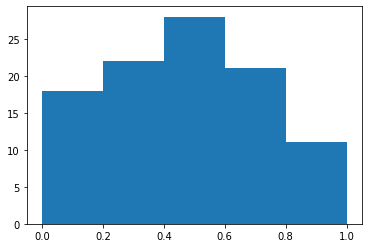

In [19]:
plt.hist(a, bins=5, range=(0,1))
plt.show()

可以看出每个统计区间都是等间隔划分的，如果需要统计的区间的长度不等，可以这样做：

In [20]:
np.histogram(a, bins=[0, 0.3, 0.5,0.8,1], range=(0, 1))

(array([31, 26, 32, 11], dtype=int64), array([0. , 0.3, 0.5, 0.8, 1. ]))

返回的第二个数组就是指定的bins参数。

histogram2d()和histogramdd()对二维和多维维数掘进行直方图统计

### 分段函数
还是以三角波函数为例，了解分段函数。

#### where函数
where函数和if-else表达式相似

In [23]:
a = np.arange(10)
np.where(a>5, 9-a, a)

array([0, 1, 2, 3, 4, 5, 3, 2, 1, 0])

当条件中的某个元素为True时, 返回数组的对应下标的值从第一个数组获取，否则从第二个数组获取。  
也可以当作lambda表达式处理。

In [26]:
def triangle_wavel(x, c, c0, he):
    x = x - x.astype(int) #三角波的周期为1，因此只取x坐标的小数部分进行计算 
    res = np.where(x < c0, x / c0 * he, (c - x) / (c - c0) * he)
    return np.where(x >= c, 0, res)

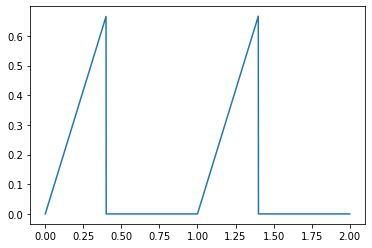

In [27]:
x = np.linspace(0,2,2000)
y = triangle_wavel(x, 0.4, 0.6, 1)
plt.plot(x, y)
plt.show()

随着分段函数的分段数量的增加，需要嵌套更多层where()。这样不便于程序的编写和阅读。 可以用select()函数解决这个问题：

In [28]:
def triangle_wave2(x, c, c0, he):
    x = x - x.astype(int)
    condlist = [x>=c, x<c0, True]
    choicelist = [0 , x/c0*hc, (c-x)/(c-c0)*hc]
    return np.select(condlist, choicelist)

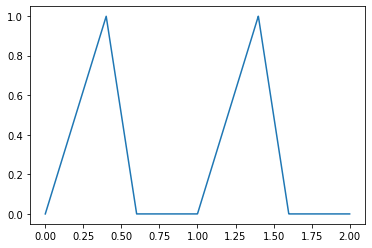

In [30]:
y = triangle_wave2(x, 0.6, 0.4, 1)
plt.plot(x, y)
plt.show()

select()其实就是switch表达式的应用。  
select()函数会产生很多中间结果，为了解决这个问题，NumPy提供了piecewise()专门用于计算分段函数。

In [31]:
def triangle_wave3(x, c, c0, he): 
    x = x - x.astype(int)
    condlist = [x>=c, x<c0]  # 只有两个条件，剩下的是默认
    funclist = [0, lambda x: x / c0 * he, lambda x: (c-x)/(c-c0)*he] # 三个处理函数
    return np.piecewise(x, condlist, funclist)

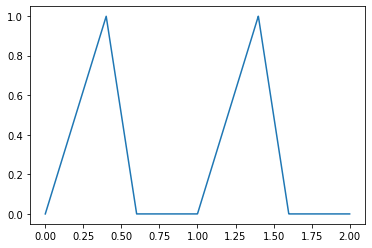

In [32]:
y = triangle_wave3(x, 0.6, 0.4, 1)
plt.plot(x, y)
plt.show()

### 操作多维数组
<img src="img/2-9.png">

concatenate()是连接多个数组的最基本的函数，其他函数都是它的快捷版本。

In [34]:
a = np.arange(10).reshape(2, -1)
b = np.arange(10,16).reshape(2, -1)
c = np.arange(0, 100, 5).reshape(-1, 5)

In [36]:
a
b
c

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([[10, 11, 12],
       [13, 14, 15]])

array([[ 0,  5, 10, 15, 20],
       [25, 30, 35, 40, 45],
       [50, 55, 60, 65, 70],
       [75, 80, 85, 90, 95]])

In [37]:
np.concatenate((a, b), axis=1)

array([[ 0,  1,  2,  3,  4, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 13, 14, 15]])

所有这些数组的形状除了第axis轴之外都相同

In [38]:
np.concatenate((a, c))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [ 0,  5, 10, 15, 20],
       [25, 30, 35, 40, 45],
       [50, 55, 60, 65, 70],
       [75, 80, 85, 90, 95]])

In [39]:
np.vstack((a,c))  # np.concatenate((a, c)), 沿0轴叠加

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [ 0,  5, 10, 15, 20],
       [25, 30, 35, 40, 45],
       [50, 55, 60, 65, 70],
       [75, 80, 85, 90, 95]])

In [40]:
np.hstack((a, b)) # np.concatenate((a, b), axis=1)沿1轴叠加

array([[ 0,  1,  2,  3,  4, 10, 11, 12],
       [ 5,  6,  7,  8,  9, 13, 14, 15]])

column_stack()和hstack()类似，沿着第1轴连接数组，但是当数组为一维时，将其形状改为(N，1), 经常用于按列连接多个一维数组。

In [42]:
d = np.array([5, 10])
np.column_stack((a, d))

array([[ 0,  1,  2,  3,  4,  5],
       [ 5,  6,  7,  8,  9, 10]])

split()和array_split()的用法基本相同，将一个数组沿着指定轴分成多个数组，可以直接指定切分轴上的切分点下标。

In [43]:
np.random.seed(42)
a = np.random.randint(0, 10, 12)
a

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4, 3, 7])

现在要将数组a切分，保证切分后的子数组都是升序排列的。

In [45]:
np.diff(a)<0 # True的下标即为切分点

array([ True, False,  True, False, False,  True, False, False,  True,
        True, False])

In [47]:
idx = np.nonzero(np.diff(a) < 0)[0]+1
idx

array([ 1,  3,  6,  9, 10], dtype=int64)

In [48]:
np.split(a, idx)

[array([6]),
 array([3, 7]),
 array([4, 6, 9]),
 array([2, 6, 7]),
 array([4]),
 array([3, 7])]

当idx为整数时，表示要将数组切分成几份，其中split()函数是平均切分，array_split是尽可能等分。

In [51]:
np.split(a, 4) # 第二个参数不能为5，因为不能等分

[array([6, 3, 7]), array([4, 6, 9]), array([2, 6, 7]), array([4, 3, 7])]

In [53]:
np.array_split(a, 5)

[array([6, 3, 7]),
 array([4, 6, 9]),
 array([2, 6]),
 array([7, 4]),
 array([3, 7])]

transpose()和swapaxes()用于修改轴的顺序，它们得到的是原数组的视图。

In [54]:
a = np.random.randint(0, 10, (2, 3, 4, 5))
a.shape

(2, 3, 4, 5)

transpose()通过其第二个参数axes指定轴的顺序，默认时表示将整个形状翻转。

In [55]:
np.transpose(a).shape

(5, 4, 3, 2)

In [56]:
np.transpose(a, axes=(0,3,2,1)).shape

(2, 5, 4, 3)

swapaxes()通过两个整数指定调换顺序的轴。

In [58]:
np.swapaxes(a, 1, 3).shape

(2, 5, 4, 3)

### 多项式函数 
多项式函数是变量的整数次幂与系数的乘积之和，可以用下面的数学公式表示:
$$f(x)=a_nx^n+a_{n-1}x^{n-1}+ \cdots + a_1x+a_0 $$

In [60]:
a = np.array([1.0, 0, -2, 1])
p = np.poly1d(a)

我们可以用polyld()表示多项式：
$$f(x)=x^3-2x+1$$
此对象可以像函数一样调用， 它返回多项式函数的值:

In [61]:
b = np.linspace(0, 10, 5)
p(b)

array([  1.   ,  11.625, 116.   , 407.875, 981.   ])

In [62]:
p + [-2, 1] # 和 p + np.polyld([-2, 1])相同

poly1d([ 1.,  0., -4.,  2.])

In [63]:
p * p #两个3次多项式相乘得到一个6次多项式

poly1d([ 1.,  0., -4.,  2.,  4., -4.,  1.])

In [64]:
p / [1, 1] #除法返M两个多项式，分别为商式和余式

(poly1d([ 1., -1., -1.]), poly1d([2.]))

多项式对象的deriv()和integ()方法分別计算多项式函数的微分和积分:

In [65]:
p.deriv()

poly1d([ 3.,  0., -2.])

In [66]:
p.integ()

poly1d([ 0.25,  0.  , -1.  ,  1.  ,  0.  ])

In [68]:
p.integ().deriv() == p

True

多项式函数的根可以使用roots()函数计算:

In [70]:
np.roots(p)

array([-1.61803399,  1.        ,  0.61803399])

In [72]:
np.set_printoptions(suppress=True, precision=4)
p(np.roots(p)) # 结果为0

array([0., 0., 0.])

除了使用多项式对象之外，也可以直接使用NumPy提供的多项式函数对表示多项式系数的数组进行运算，下面使用polyfit()拟合sin函数：

In [73]:
x = np.linspace(-np.pi/2, np.pi/2, 1000)
y = np.sin(x)

for deg in [3, 5, 7]: # 分别使用3次，5次，7次多项式拟合
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x)-y) # 计算每个样本的误差
    print("degree:{}: {}".format(deg, a))
    print("max error: {}".format(error.max()))

degree:3: [-0.145   0.      0.9887  0.    ]
max error: 0.008946993767080635
degree:5: [ 0.0076 -0.     -0.1658  0.      0.9998 -0.    ]
max error: 0.00015740861417157248
degree:7: [-0.0002 -0.      0.0083  0.     -0.1667 -0.      1.      0.    ]
max error: 1.5268255799671948e-06


### 各种乘积运算
数组一共有以下几种乘积：
+ dot: 乘积
+ inner： 内积
+ outer： 外积
+ tensordot： 张量乘积

In [75]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [77]:
b = np.random.randint(0,10,(3,2))
b

array([[5, 3],
       [9, 6],
       [8, 6]])

In [78]:
np.dot(a, b) # 最常见的乘积

array([[25, 18],
       [91, 63]])

In [81]:
c = np.arange(6).reshape(2,3)
np.inner(a, c)  # 内积就是每一行乘积

array([[ 5, 14],
       [14, 50]])

In [83]:
np.outer(a, c)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  2,  4,  6,  8, 10],
       [ 0,  3,  6,  9, 12, 15],
       [ 0,  4,  8, 12, 16, 20],
       [ 0,  5, 10, 15, 20, 25]])

In [84]:
np.tensordot(a, c) # 对应元素乘积之和

array(55)

In [85]:
a*c # 对应元素乘积

array([[ 0,  1,  4],
       [ 9, 16, 25]])